In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [35]:
df = pd.read_csv('climate_action_data.csv')

In [36]:
print("DataFrame Columns:")
print(df.columns)
print("\nInitial DataFrame head:")
print(df.head())
print("\nDataFrame info:")
df.info()
print("\nDescriptive statistics (initial):")
print(df.describe(include='all'))
print("\nMissing values before cleaning:")
print(df.isnull().sum())
print("\nData types before cleaning:")
print(df.dtypes)
df.isnull().sum()

DataFrame Columns:
Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

Initial DataFrame head:
  Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C) Humidity(%)  \
0  SEN-1000  2025-01-01            36.22    6.98           21.3        50.4   
1  SEN-1001  2025-01-02            76.55    5.03           23.5        34.3   
2  SEN-1002  2025-01-03            61.24    6.52           21.9        54.6   
3  SEN-1003  2025-01-04            51.91    6.62           24.0        48.7   
4  SEN-1004  2025-01-05            20.92    5.98           19.2        70.6   

  Crop_Type Fertilizer_Recommended(kg/ha) Irrigation_Recommended(mm)  \
0  Tomatoes                          67.6                       26.6   
1     Wheat                         130.4                        8.3   
2  Tomatoes                          36.0 

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [37]:
numeric_cols = [
    'Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)'
]
categorical_cols = [
   'Crop_Type','Drone_Image_ID','Sensor_ID']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Ensure numeric
        df[col] = df[col].fillna(df[col].median())
    else:
        print(f"Warning: Numeric column '{col}' (assumed) not found in DataFrame during cleaning.")

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        print(f"Warning: Categorical column '{col}' (assumed) not found in DataFrame during cleaning.")


In [38]:
df.isnull().sum()


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [39]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(f"Number of duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicate dates: {df['Date'].duplicated().sum()}")
df = df.drop_duplicates(subset=['Date'], keep='first')

Number of duplicates: 111
Duplicate dates: 3


In [40]:
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


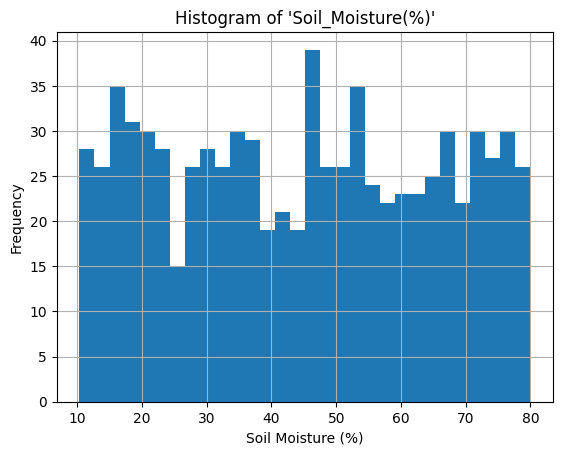

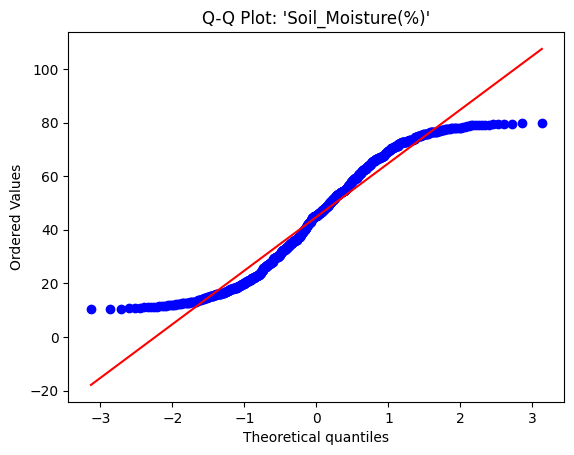

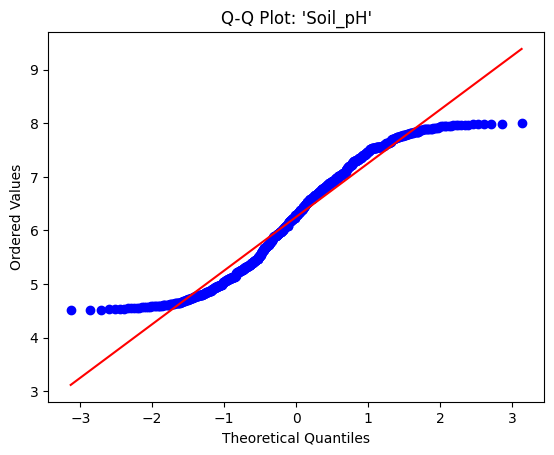

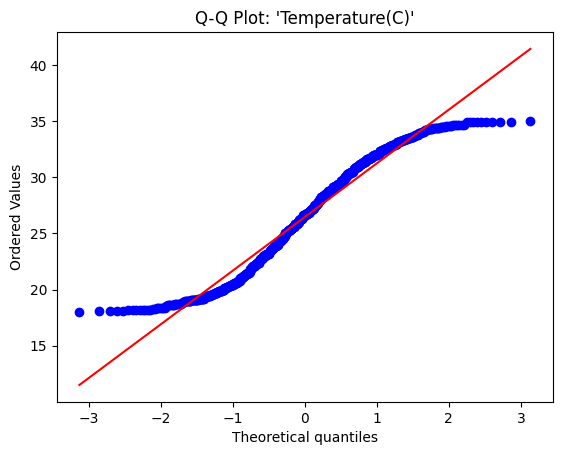

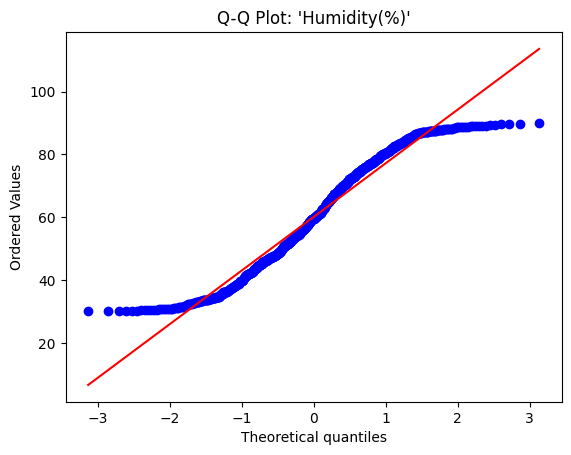

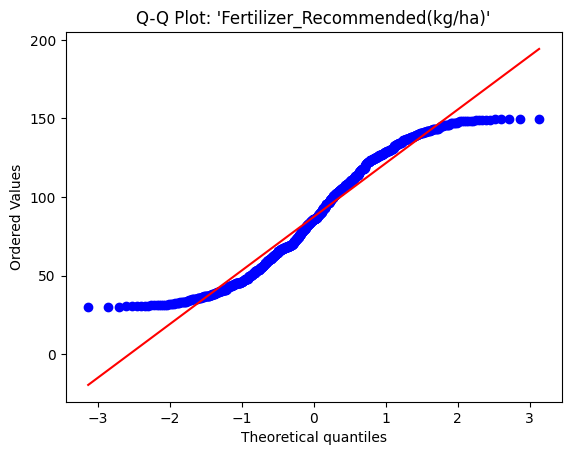

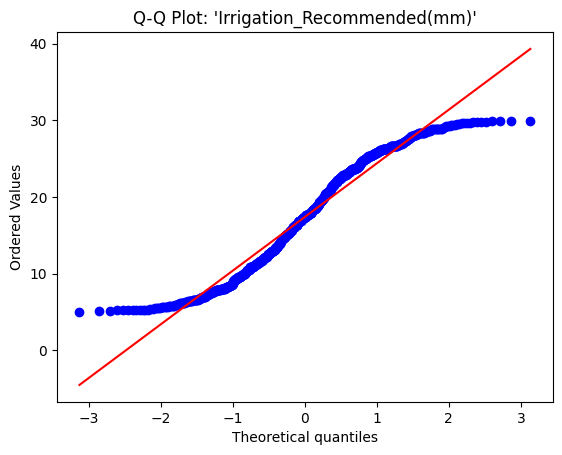

In [41]:
# determine distribution of 'Soil_Moisture(%)'
df['Soil_Moisture(%)'].hist(bins=30)
plt.title("Histogram of 'Soil_Moisture(%)'")
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')
plt.show()
import scipy.stats as stats

stats.probplot(df['Soil_Moisture(%)'], dist="norm", plot=plt)
plt.title("Q-Q Plot: 'Soil_Moisture(%)'")
plt.show()
# determine distribution of 'Soil_pH'
stats.probplot(df['Soil_pH'], dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.title("Q-Q Plot: 'Soil_pH'")
plt.show()
# Visualize the distribution of 'Temperature(C)'
stats.probplot(df['Temperature(C)'], dist="norm", plot=plt)
plt.title("Q-Q Plot: 'Temperature(C)'")
plt.show()
# Visualize the distribution of 'Humidity(%)'
stats.probplot(df['Humidity(%)'], dist="norm", plot=plt)
plt.title("Q-Q Plot: 'Humidity(%)'")
plt.show()
# Visualize the distribution of 'Fertilizer_Recommended(kg/ha)'
stats.probplot(df['Fertilizer_Recommended(kg/ha)'], dist="norm", plot=plt)
plt.title("Q-Q Plot: 'Fertilizer_Recommended(kg/ha)'")
plt.show()
# Visualize the distribution of 'Irrigation_Recommended(mm)'
stats.probplot(df['Irrigation_Recommended(mm)'], dist="norm", plot=plt)
plt.title("Q-Q Plot: 'Irrigation_Recommended(mm)'")
plt.show()


In [42]:
# not uniformly distributed so use IQ range for outlier detection
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])
        df[col] = df[col].fillna(df[col].median())
df.head()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


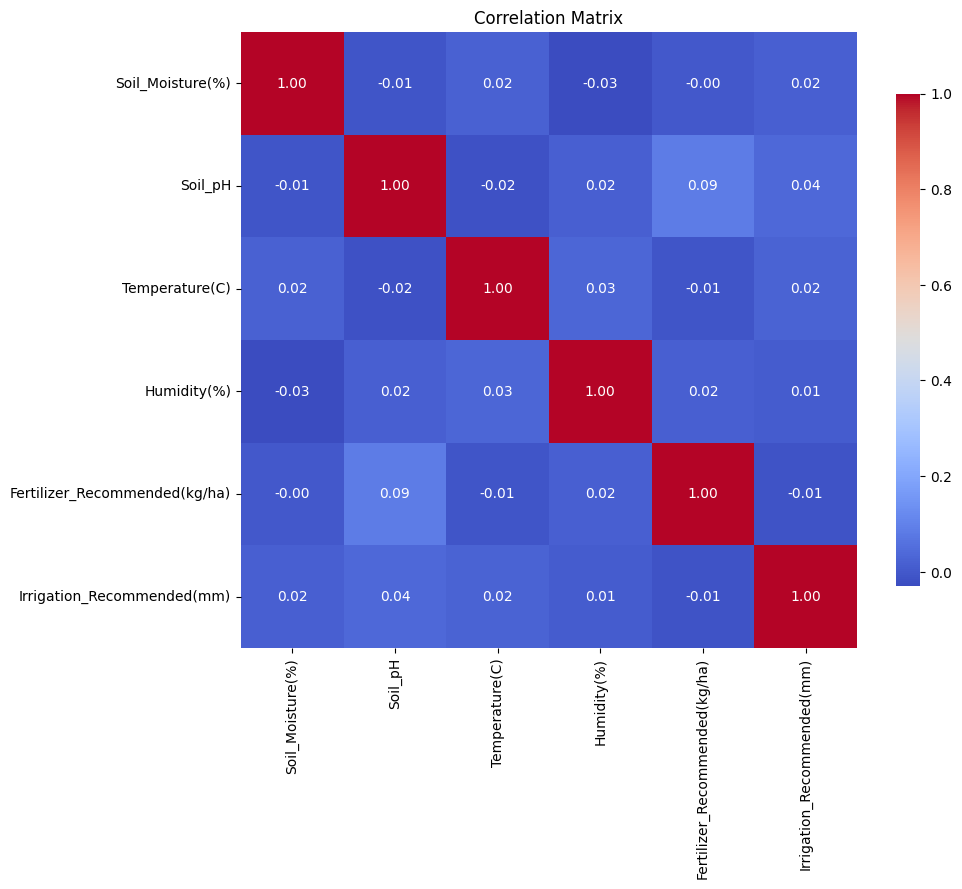

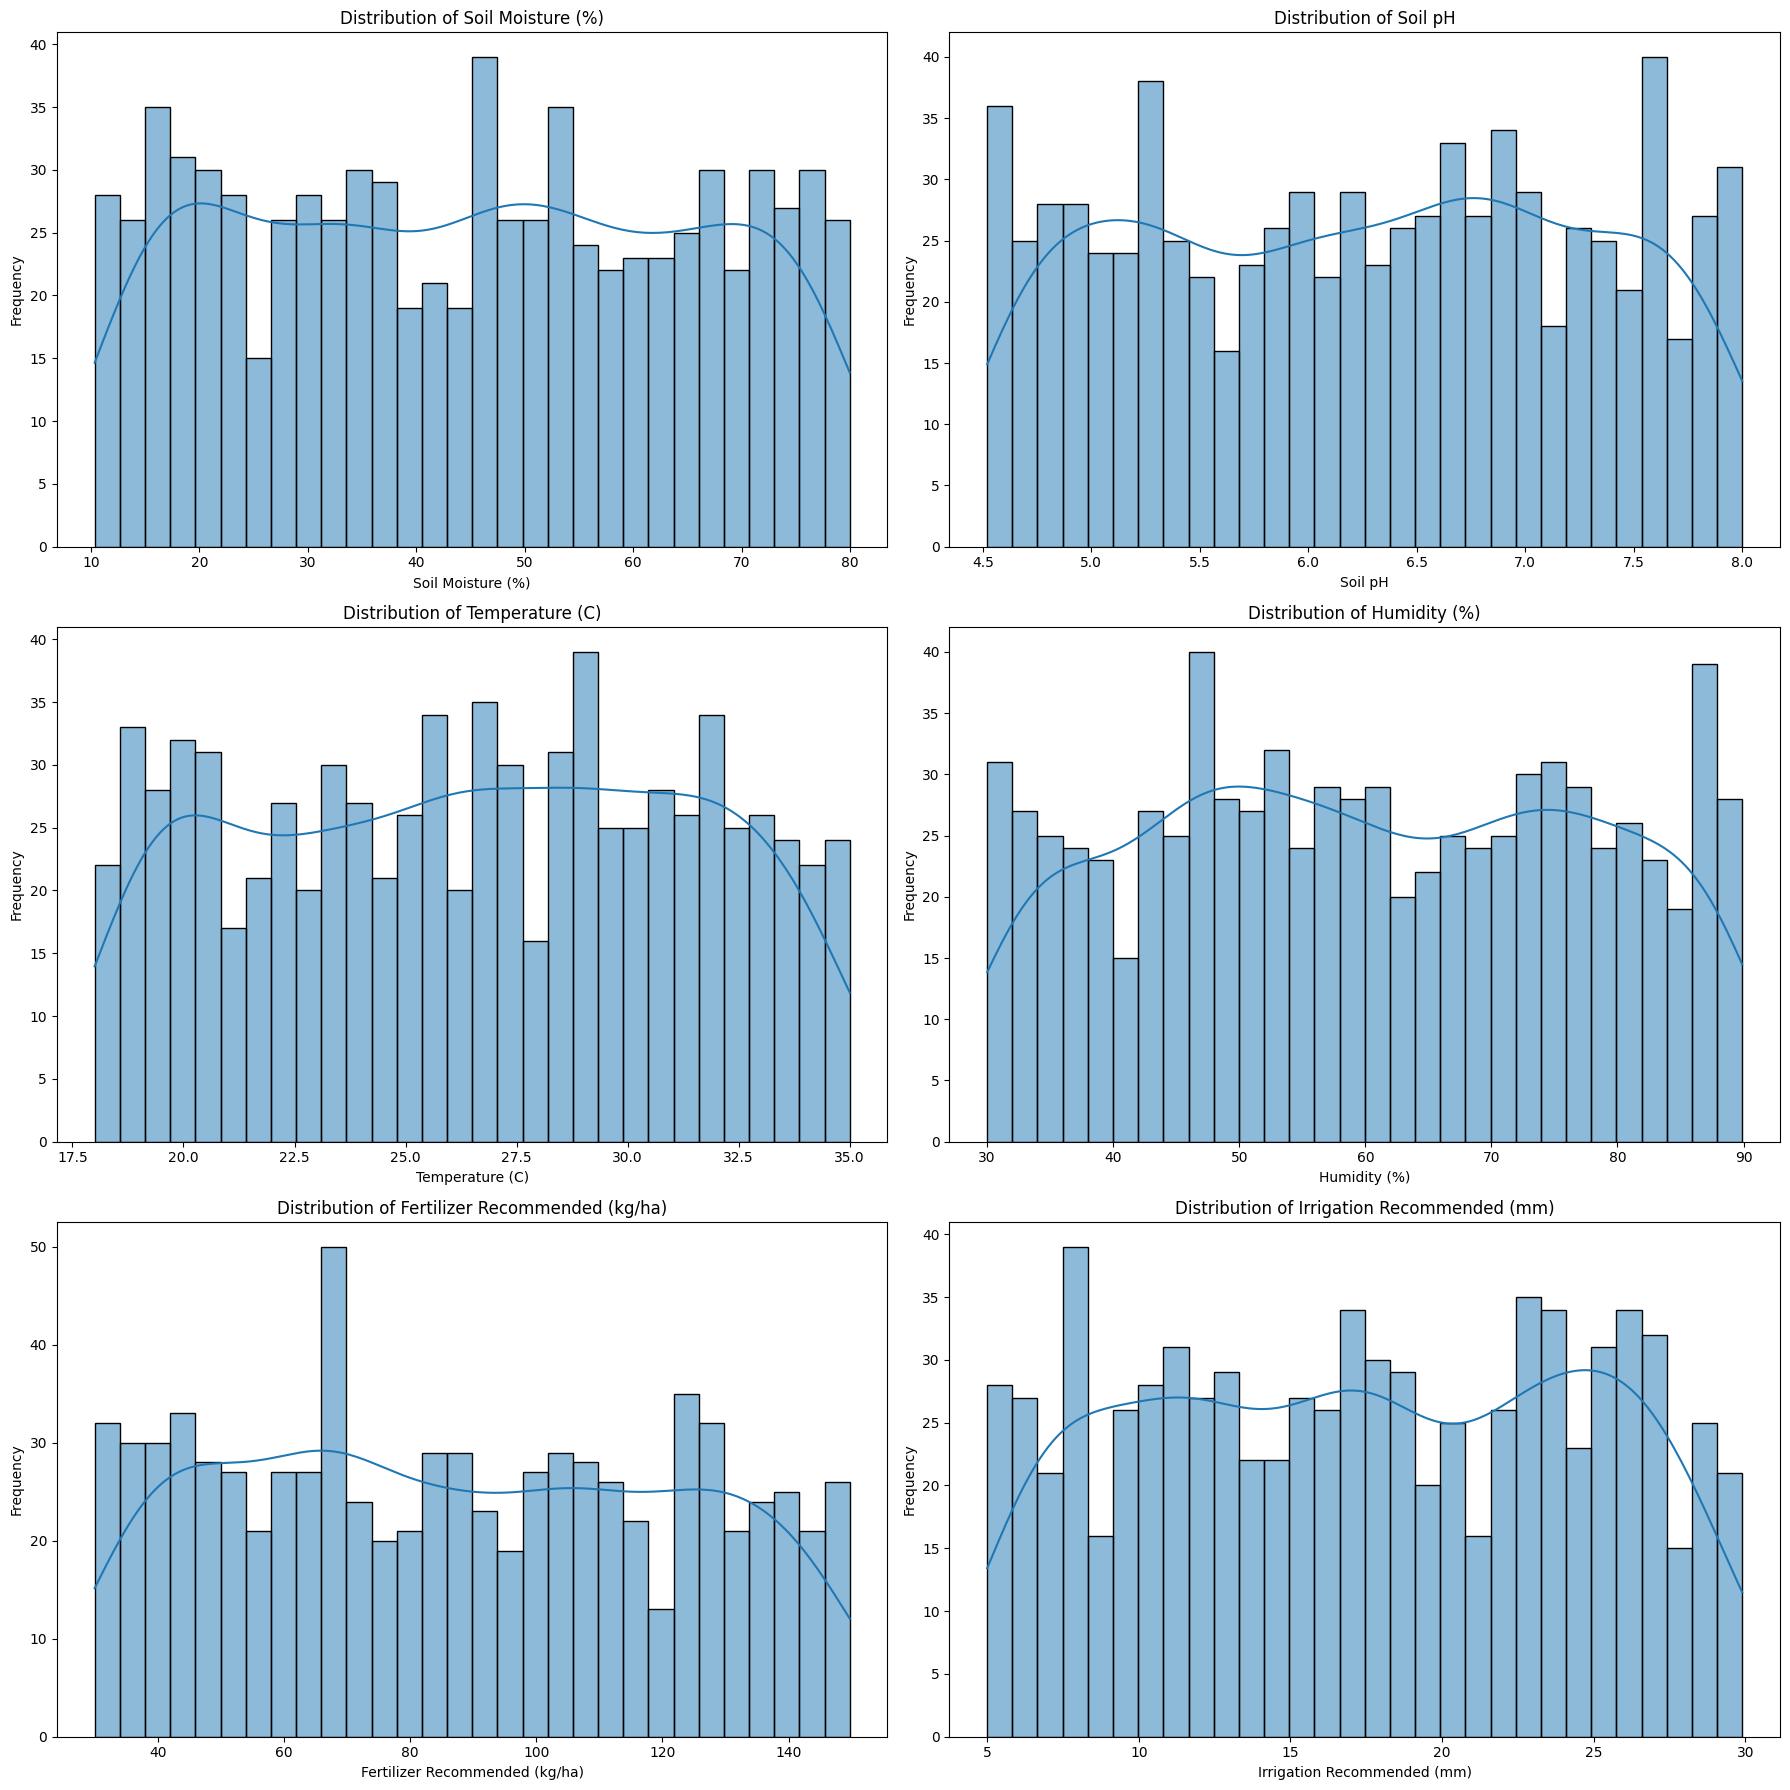

In [43]:
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

# histogram of 'Soil_Moisture(%)'
plt.figure(figsize=(18, 18))

plt.subplot(3, 2, 1)
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title("Distribution of Soil Moisture (%)")
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 2)
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title("Distribution of Soil pH")
plt.xlabel('Soil pH')
plt.ylabel('Frequency')

plt.subplot(3, 2, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title("Distribution of Temperature (C)")
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 4)
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title("Distribution of Humidity (%)")
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 5)
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title("Distribution of Fertilizer Recommended (kg/ha)")
plt.xlabel('Fertilizer Recommended (kg/ha)')
plt.ylabel('Frequency')

plt.subplot(3, 2, 6)
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title("Distribution of Irrigation Recommended (mm)")
plt.xlabel('Irrigation Recommended (mm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Soil_pH                       0.085333
Humidity(%)                   0.017329
Soil_Moisture(%)             -0.000944
Temperature(C)               -0.007332
Irrigation_Recommended(mm)   -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


<Figure size 1200x800 with 0 Axes>

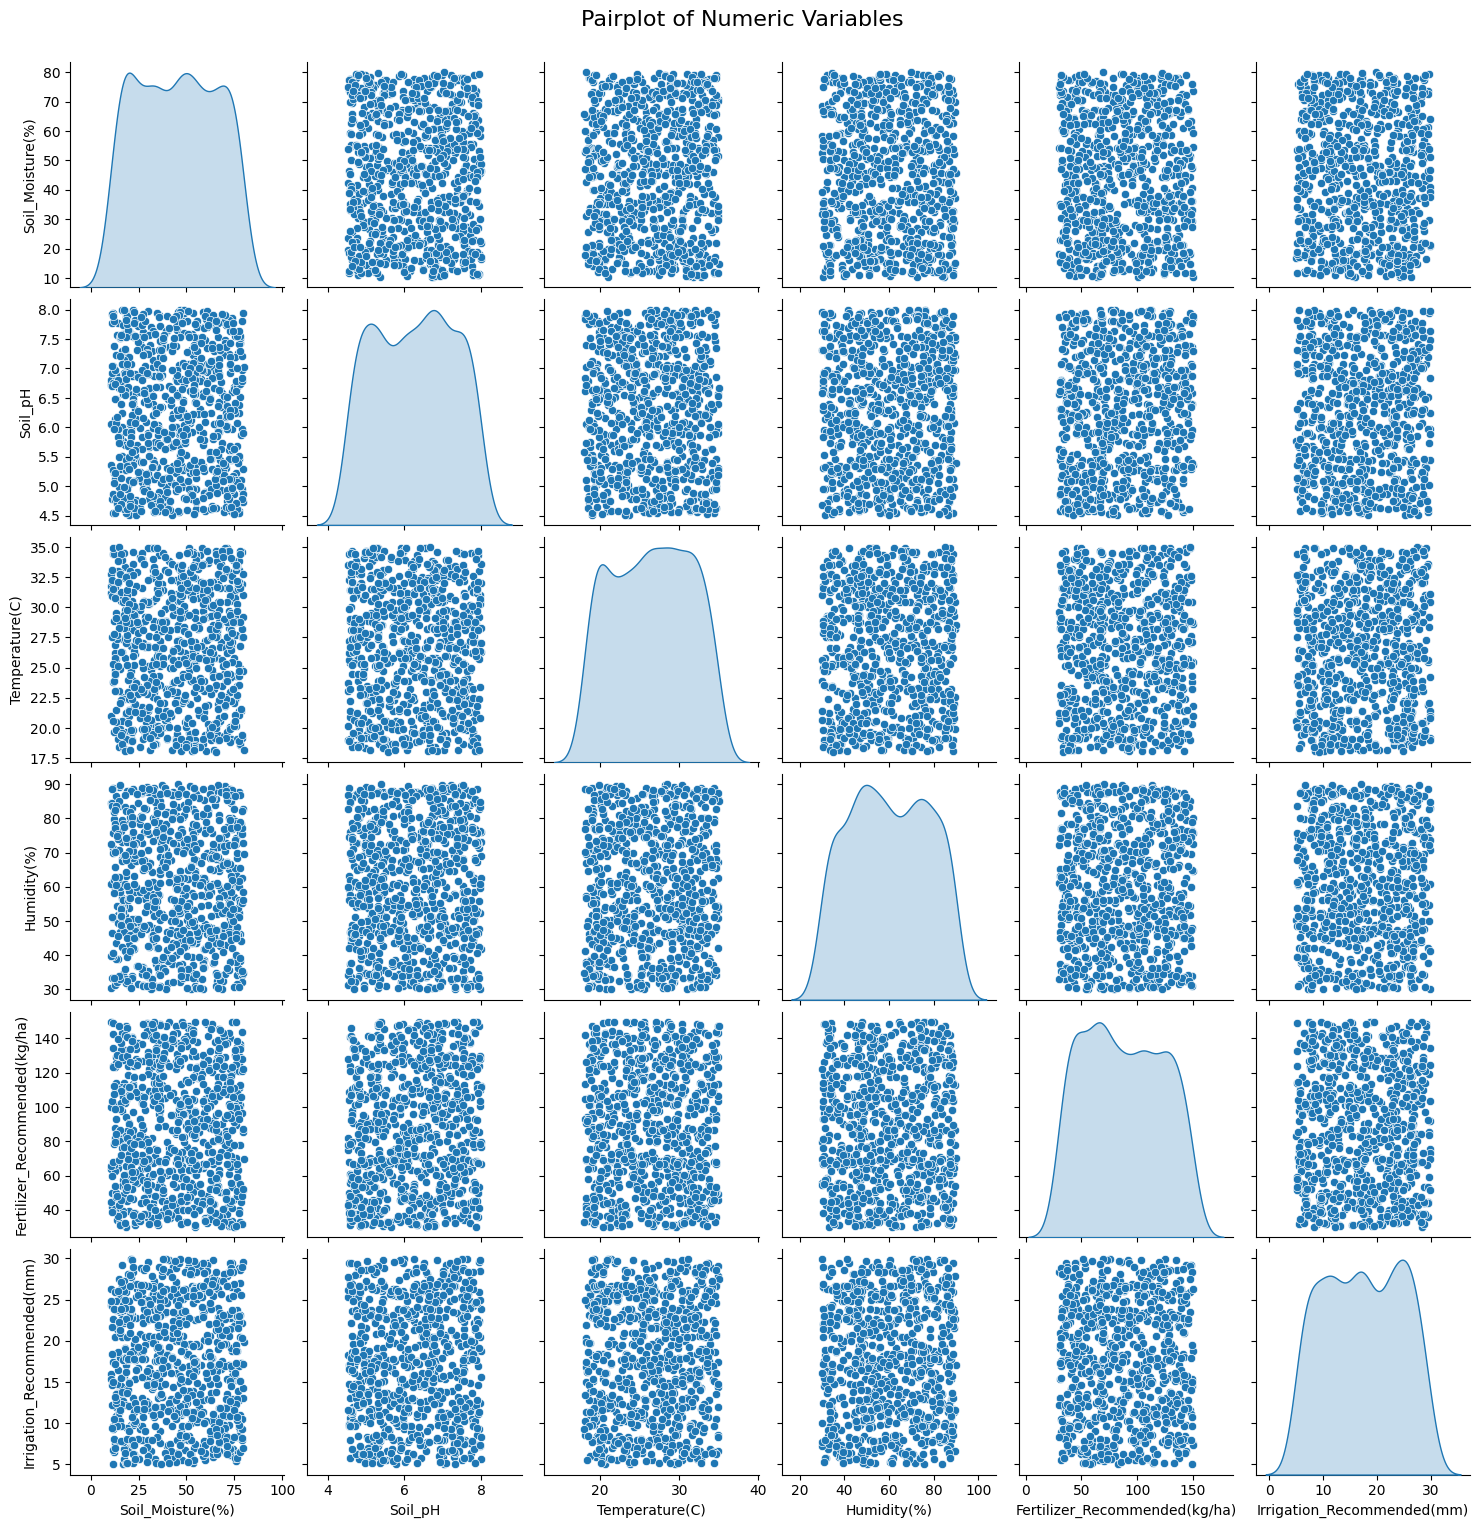

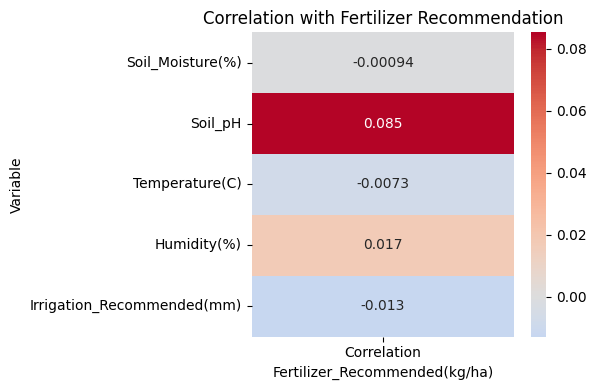

In [45]:
fert_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)')
print(fert_corr.sort_values(ascending=False))
# Visualize the relationship between 'Fertilizer_Recommended(kg/ha)' and other numeric variables
plt.figure(figsize=(12, 8))
sns.pairplot(df, vars=numeric_cols, kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Numeric Variables", y=1.02, fontsize=16)
plt.show()

# correlation for 'Fertilizer_Recommended(kg/ha)' with other numeric variables
plt.figure(figsize=(6, 4))
sns.heatmap(fert_corr.to_frame(name='Correlation'), annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title("Correlation with Fertilizer Recommendation")
plt.ylabel("Variable")
plt.xlabel("Fertilizer_Recommended(kg/ha)")
plt.tight_layout()
plt.show()


In [ ]:
avg_moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)

print("Average Soil Moisture by Crop Type:")
print(avg_moisture_by_crop)

highest_moisture_crop = avg_moisture_by_crop.index[0]
print(f"\nCrop with highest average soil moisture: {highest_moisture_crop}")

Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.337781
Tomatoes    44.015719
Lettuce     42.932100
Name: Soil_Moisture(%), dtype: float64

Crop with highest average soil moisture: Wheat


In [ ]:

high_temp_crops = df[df['Temperature(C)'] > 30.0]

print("\nCrops experiencing temperatures above 30°C:")
print(high_temp_crops['Crop_Type'].unique())

print("\nRecommendation: For these crops, increase irrigation volume.")


Crops experiencing temperatures above 30°C:
['Lettuce' 'Maize' 'Wheat' 'Tomatoes' 'Beans']

Recommendation: For these crops, increase irrigation volume.


In [ ]:
cleaned_precision_agriculture_data='cleaned_precision_agriculture_data.csv'
df.to_csv(cleaned_precision_agriculture_data, index=False)
# Save the cleaned data to a CSV file
print(f"\nCleaned data saved to {cleaned_precision_agriculture_data}")


Cleaned data saved to cleaned_precision_agriculture_data.csv
